<a href="https://colab.research.google.com/github/AndrewVandenberg/Portfolio/blob/main/TensorFlow_Gem_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['fake_reg.csv']))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1', 'feature2']].values

In [ ]:
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train) # fit calculates the parameters it needs to perform 


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train) # perform transformation 

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu')) 
model.add(Dense(4, activation = 'relu')) 

model.add(Dense(1))
# optimizer is asking how we want to perform the gradient descent
# loss function is asking about cost function
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 42.1361
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 39.9166
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 38.1529
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 36.1483
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 34.5673
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 33.1170
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 31.9354
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 30.8176
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 29.8106
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 29.2687
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 28.3719
Epoch 12/250
22/22 [==============================] - 0s 1ms/step - loss: 27.7438
Epoch 13/250
22/22 [=====

In [ ]:
model_history = pd.DataFrame(model.history.history)

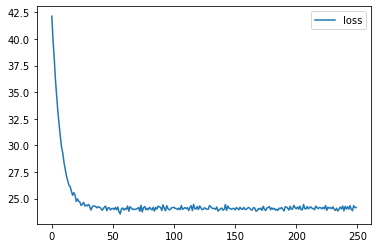

In [ ]:
model_history.plot()

## Evaluation of model
* How will the model perform on the test data?

In [ ]:
model.evaluate(X_test, y_test) # Returns models loss

10/10 [==============================] - 0s 1ms/step - loss: 25.1695


25.169506072998047

In [ ]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 998us/step - loss: 23.7286


23.728628158569336

In [ ]:
test_predictions = model.predict(X_test) # We pass in our test features, and our model predicts
                                         # what the price should be based on those features

In [ ]:
test_predictions # A list of the predictions of what the price should be based on the features

array([[405.5285 ],
       [624.0229 ],
       [592.5811 ],
       [572.6491 ],
       [366.80643],
       [579.6121 ],
       [515.409  ],
       [459.40903],
       [549.64246],
       [447.8087 ],
       [612.25616],
       [549.3511 ],
       [419.3538 ],
       [409.11136],
       [651.7621 ],
       [437.57562],
       [508.81146],
       [660.451  ],
       [663.1087 ],
       [565.9582 ],
       [334.38406],
       [445.11673],
       [382.73773],
       [378.96445],
       [567.01447],
       [611.0583 ],
       [532.77136],
       [428.12503],
       [655.9602 ],
       [414.33255],
       [442.91928],
       [485.45645],
       [438.69095],
       [682.3947 ],
       [425.0224 ],
       [417.93677],
       [502.2808 ],
       [550.8777 ],
       [510.08524],
       [395.57974],
       [619.07056],
       [416.8818 ],
       [604.9127 ],
       [446.24863],
       [502.33652],
       [582.1588 ],
       [669.5403 ],
       [490.73962],
       [318.72345],
       [485.75568],


In [ ]:
# test_pred is now a pandas series instead of a numpy array, which means it can be concatenated with the TRUE y prices
test_predictions = pd.Series(test_predictions.reshape(300,))

In [ ]:
pred_df = pd.DataFrame(y_test, columns = ['True Y'])

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions], axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.528503
1,624.156198,624.022888
2,582.455066,592.581116
3,578.588606,572.649109
4,371.224104,366.806427
...,...,...
295,525.704657,529.419922
296,502.909473,515.684387
297,612.727910,610.119995
298,417.569725,417.209534


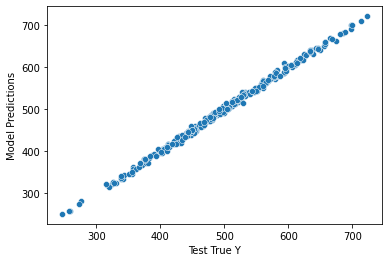

In [ ]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.025836735090146

In [ ]:
df.describe() # So a $4.00 MAE is very good, given the mean is ~ 500

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [ ]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.16949654146615

In [ ]:
new_gem = [[998, 1000]]

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem) # How you predict a new gem/data

array([[419.9364]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_gem_model.h5')

In [ ]:
later_model = load_model('my_gem_model.h5')

In [ ]:
later_model.predict(new_gem)

array([[419.9364]], dtype=float32)